## Edge and Corner Detection

In this notebook, the edge and corner detection are tested.

## Sobel Operator in X

Apply the sobel operator in x-direction to a grayscale image. Be mindful of potential overflows.

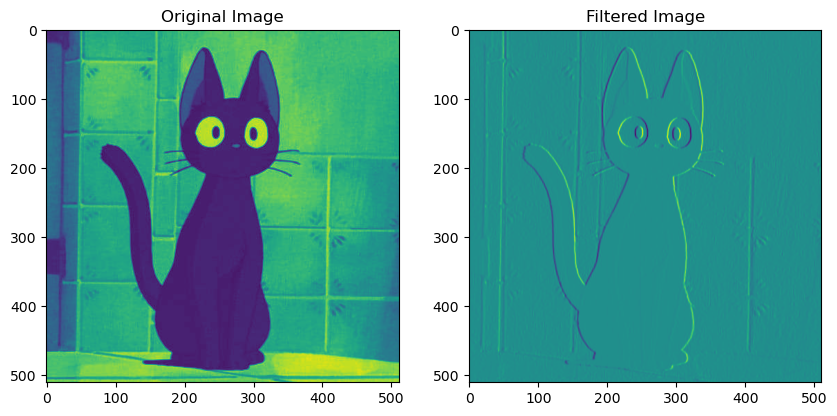

In [57]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
def loadImage(path, resizeFactor):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape  # Number of rows and columns in the image
    image = cv2.resize(image, (int(width * resizeFactor), int(height * resizeFactor)))
    return image

def showImage(image, image2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    # plt.imshow(image)
    plt.imshow(image)
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(image2)
    plt.title('Filtered Image')
    return plt.show()

image = loadImage('ressources/jiji.jpg', 1)

np_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_x = cv2.filter2D(image,cv2.CV_32F, np_kernel_x)

showImage(image, sobel_x)

## Sobel Operator in Y

Apply the sobel operator in y-direction for the same image as before.

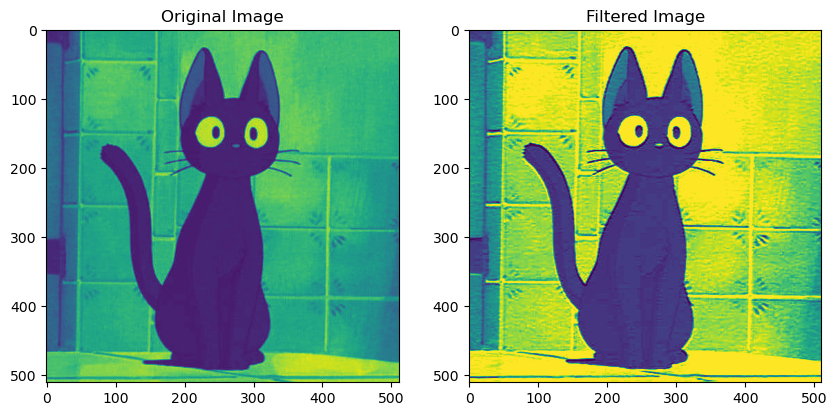

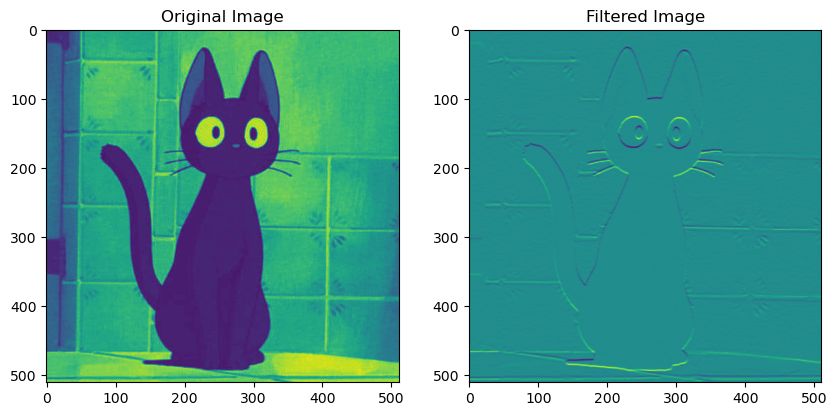

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
image = loadImage('ressources/jiji.jpg', 1)

np_kernel_y_drawing = np.array([[-1, -0.5, -1], [0, 0, 0], [1, 2, 1]])
sobel_y_drawing = cv2.filter2D(image, -1, np_kernel_y_drawing)

np_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = cv2.filter2D(image,cv2.CV_32F, np_kernel_y)

showImage(image, sobel_y_drawing)
showImage(image, sobel_y)

## Gradient Magnitude

Finally, compute the gradient magnitude from the 2 previous tasks $$G = \sqrt{G_x^2 + G_y^2}$$ and show the final image.

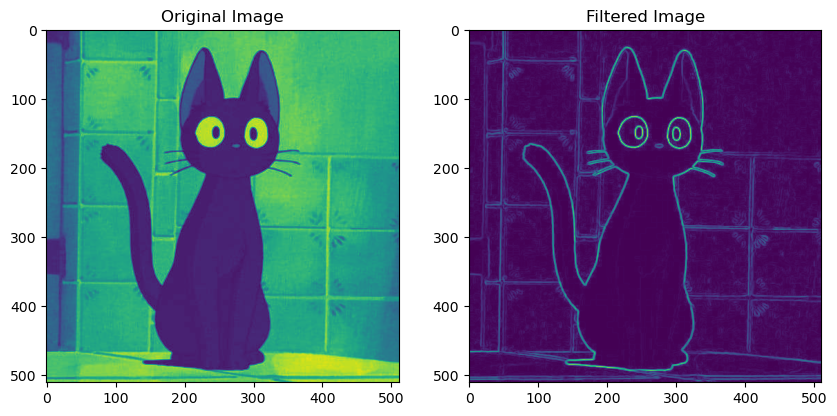

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
image = loadImage('ressources/jiji.jpg', 1)

gradient = np.sqrt(sobel_x**2 + sobel_y**2)

showImage(image, gradient)

## Harris Corner Detection

Implement the Harris Corner Detection algorithm by yourself - you're allowed use tutorials etc., but in that case, study the code in detail so that you can explain it.

Apply your Harris Corner detection algorithm on an image of your own.

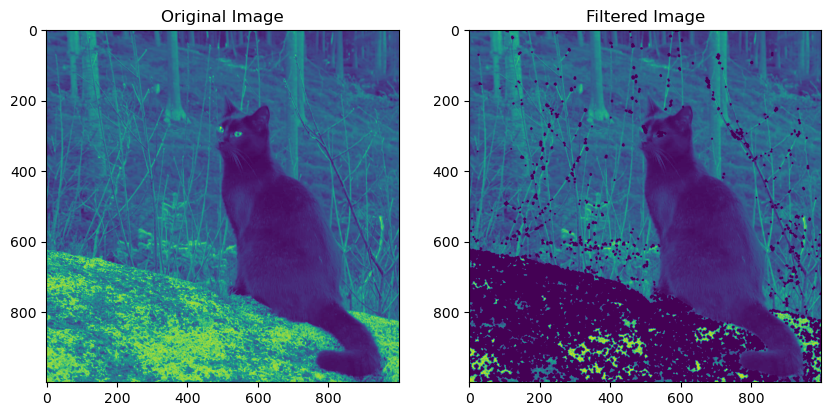

In [44]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
image = loadImage('ressources/smoky.jpg', 1)
image2 = image.copy()


Ix = cv2.Sobel(image2, cv2.CV_64F, 1, 0, ksize = 3)
Iy = cv2.Sobel(image2, cv2.CV_64F, 0, 1, ksize = 3)

Ix2 = Ix**2
Iy2 = Iy**2
Ixy = Ix * Iy

window_size = 3
k = 0.04
offset = window_size // 2
corner_response = np.zeros_like(image2, dtype=np.float32)

for y in range(offset, image2.shape[0] - offset):
    for x in range(offset, image2.shape[1] - offset):
        Sxx = np.sum(Ix2[y - offset:y + offset +1, x - offset: x+ offset +1])
        Syy = np.sum(Iy2[y - offset:y + offset +1, x - offset: x+ offset +1])
        Sxy = np.sum(Ixy[y - offset:y + offset +1, x - offset: x+ offset +1])

        det = Sxx * Syy -Sxy * Sxy
        trace = Sxx + Syy
        corner_response[y,x] = det - k * (trace ** 2)

# Threshold the corner response
threshold = 0.01 * corner_response.max()
corner_response[corner_response < threshold] = 0
# Mark corners on the image
for y in range(offset, image2.shape[0] - offset):
    for x in range(offset, image2.shape[1] - offset):
        if corner_response[y, x] > threshold:
            cv2.circle(image2, (x, y), 3, (0, 0, 255), -1)


showImage(image, image2)

## OpenCV cornerHarris

Use OpenCV's *cornerHarris* function to detect corners. Use the same input parameters as in the previous task, and compare the results. Be prepared to discuss differences when presenting in class.

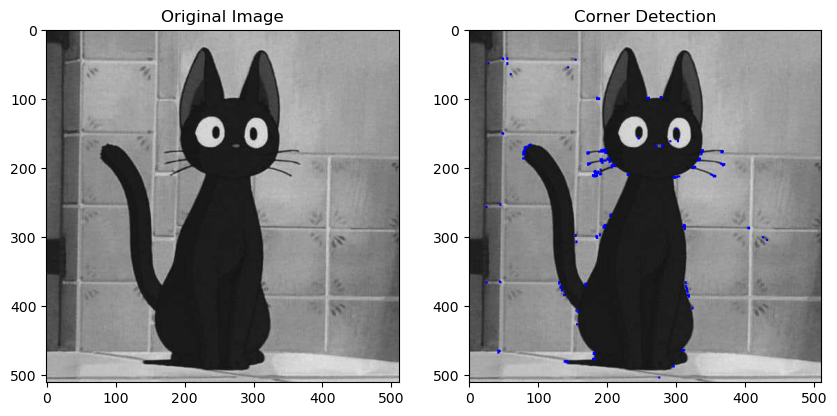

In [47]:
# import numpy as np
# import cv2
# from matplotlib import pyplot as plt
# import math
# image = loadImage('ressources/jiji.jpg', 1)
# image2 = image.copy()

# corner = cv2.cornerHarris(image2, 2,3,0.04)
# corner = cv2.dilate(corner,None)
# image2[corner>0.01*corner.max()]= [0, 0, 255]

# image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
# image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2RGB)
# showImage(image, image2)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('ressources/jiji.jpg', cv2.IMREAD_GRAYSCALE)

# Convert the image to RGB for visualization purposes
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Applying the cornerHarris function
corner = cv2.cornerHarris(image, 2, 3, 0.04)

# Dilate the corners for better visualization, not necessary for the actual algorithm
corner = cv2.dilate(corner, None)

# Define the red color in BGR format
red_color = [0, 0, 255]

# Modify the corner colors to red
image_rgb[corner > 0.01 * corner.max()] = red_color

# Display the original and modified images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_rgb)
plt.title('Corner Detection')
plt.show()


### Contrast

Conduct a series of experiments to determine how image contrast affects the performance of the Harris corner detector.

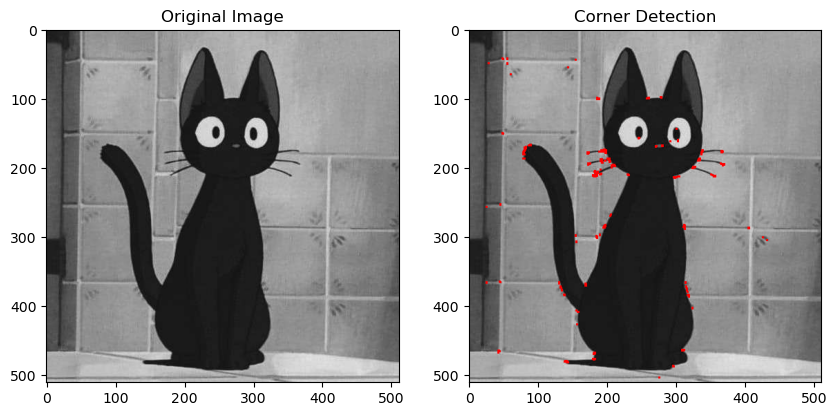

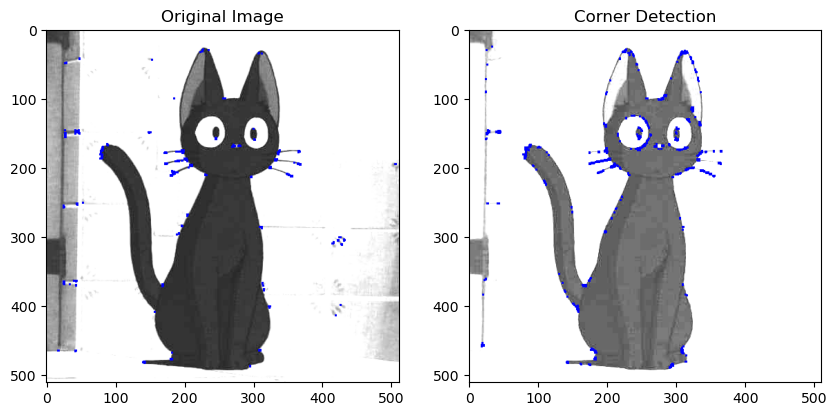

In [41]:
# import numpy as np
# import cv2
# from matplotlib import pyplot as plt
# import math
# image = loadImage('ressources/jiji.jpg', 1)
# image2 = image.copy()

# corner = cv2.cornerHarris(image2, 2,3,0.04)
# corner = cv2.dilate(corner,None)
# image2[corner>0.01*corner.max()]= [0, 0, 255]

# image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
# image2 = cv2.cvtColor(image2, cv2.COLOR_GRAY2RGB)
# showImage(image, image2)

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('ressources/jiji.jpg', cv2.IMREAD_GRAYSCALE)

# Convert the image to RGB for visualization purposes
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Define the contrast adjustment factor (1.0 for no change)
contrast_factor = 1  # Adjust this value to increase or decrease contrast

# Apply the contrast adjustment
adjusted_image = cv2.convertScaleAbs(image, alpha=contrast_factor, beta=0)

corner = cv2.cornerHarris(adjusted_image, 2, 3, 0.04)
corner = cv2.dilate(corner, None)
# Convert the adjusted image back to RGB for visualizing the corners
adjusted_image_rgb = cv2.cvtColor(adjusted_image, cv2.COLOR_GRAY2RGB)
# Mark corners on the adjusted image
red_color = [255, 0, 0]  # Red color for the corners
adjusted_image_rgb[corner > 0.01 * corner.max()] = red_color


contrast_factor = 2 
adjusted_image_2 = cv2.convertScaleAbs(image, alpha=contrast_factor, beta=0)
corner = cv2.cornerHarris(adjusted_image_2, 2, 3, 0.04)
corner = cv2.dilate(corner, None)
adjusted_image_2_rgb = cv2.cvtColor(adjusted_image_2, cv2.COLOR_GRAY2RGB)
red_color = [0, 0, 255]
adjusted_image_2_rgb[corner > 0.01 * corner.max()] = red_color

contrast_factor = 4 
adjusted_image_3 = cv2.convertScaleAbs(image, alpha=contrast_factor, beta=0)
corner = cv2.cornerHarris(adjusted_image_3, 2, 3, 0.04)
corner = cv2.dilate(corner, None)
adjusted_image_3_rgb = cv2.cvtColor(adjusted_image_3, cv2.COLOR_GRAY2RGB)
red_color = [0, 0, 255]
adjusted_image_3_rgb[corner > 0.01 * corner.max()] = red_color

# Display the original and modified images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image_rgb)
plt.title('Corner Detection')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(adjusted_image_2_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image_3_rgb)
plt.title('Corner Detection')
plt.show()


### Rotation and Distortion

Explore how rotation and distortion of the image affect the performance of the Harris corner detector.

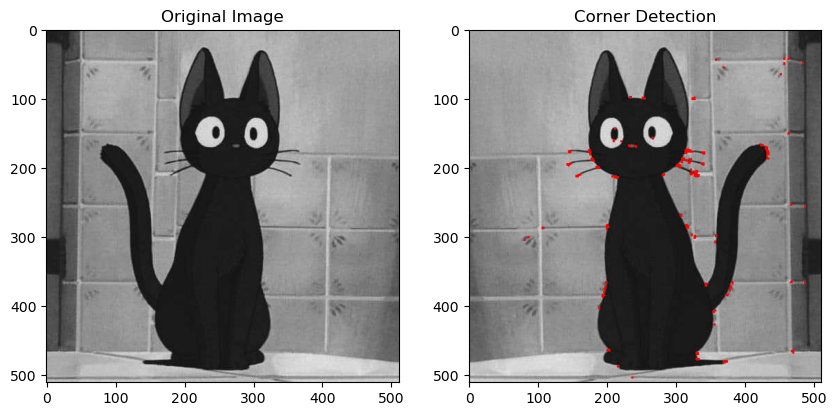

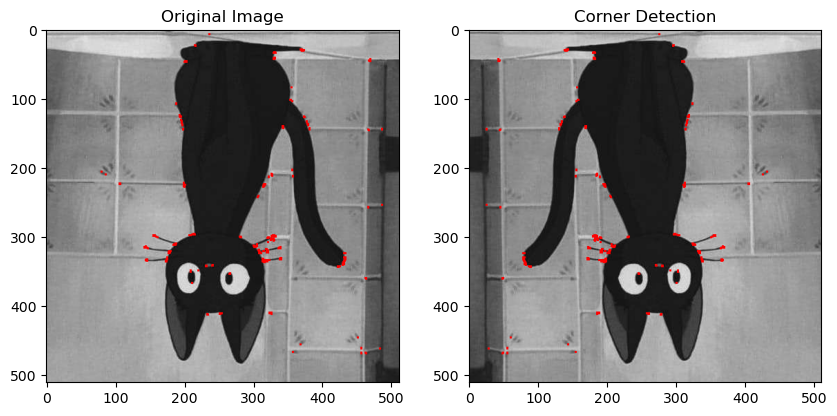

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('ressources/jiji.jpg', cv2.IMREAD_GRAYSCALE)

# Convert the image to RGB for visualization purposes
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

adjusted_image = cv2.flip(image, 1)
# Apply corner detection to the grayscale image
corner = cv2.cornerHarris(adjusted_image, 2, 3, 0.04)
corner = cv2.dilate(corner, None)
# Convert the adjusted image back to RGB for visualizing the corners
adjusted_image_rgb = cv2.cvtColor(adjusted_image, cv2.COLOR_GRAY2RGB)
# Mark corners on the adjusted image
red_color = [255, 0, 0]  # Red color for the corners
adjusted_image_rgb[corner > 0.01 * corner.max()] = red_color

adjusted_image_2 = cv2.flip(image, -1)
corner = cv2.cornerHarris(adjusted_image_2, 2, 3, 0.04)
corner = cv2.dilate(corner, None)
adjusted_image_2_rgb = cv2.cvtColor(adjusted_image_2, cv2.COLOR_GRAY2RGB)
red_color = [255, 0, 0]  # Red color for the corners
adjusted_image_2_rgb[corner > 0.01 * corner.max()] = red_color

adjusted_image_3 = cv2.flip(adjusted_image, -1)
corner = cv2.cornerHarris(adjusted_image_3, 2, 3, 0.04)
corner = cv2.dilate(corner, None)
adjusted_image_3_rgb = cv2.cvtColor(adjusted_image_3, cv2.COLOR_GRAY2RGB)
red_color = [255, 0, 0]  # Red color for the corners
adjusted_image_3_rgb[corner > 0.01 * corner.max()] = red_color

# Display the original and modified images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image_rgb)
plt.title('Corner Detection')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(adjusted_image_2_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image_3_rgb)
plt.title('Corner Detection')
plt.show()


### Noise

Determine how image noise affects the performance of the Harris detector in terms of the positional accuracy of the detected corners and the omission of actual corners.

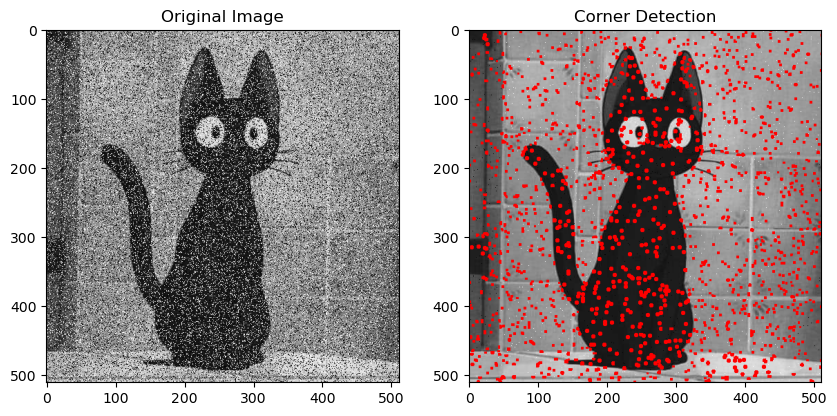

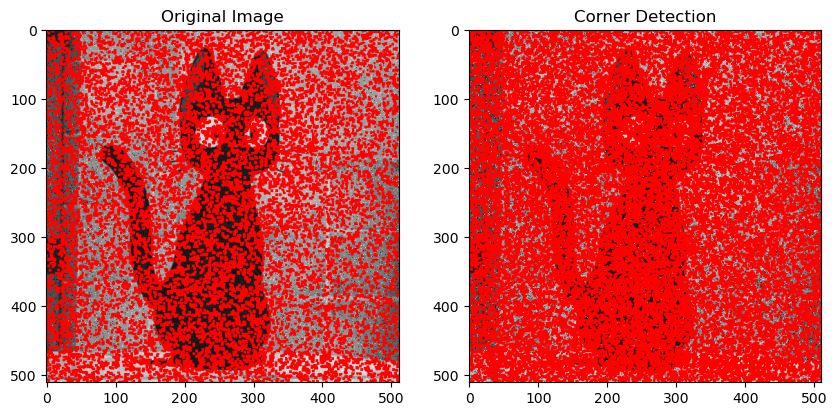

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def add_noise(img, pct_of_noise):
    pct = max(min(pct_of_noise, 1.0), 0.0) #restrict percent to [0, 1]
    row, col = img.shape
    number_of_total_pixels = row * col
    number_of_noise_pixels = int(pct * number_of_total_pixels / 2)
    for i in range(number_of_noise_pixels): 
        y_coord=random.randint(0, row - 1) 
        x_coord=random.randint(0, col - 1) 
        img[y_coord][x_coord] = 255         
    for i in range(number_of_noise_pixels): 
        y_coord=random.randint(0, row - 1) 
        x_coord=random.randint(0, col - 1) 
        img[y_coord][x_coord] = 0          
    return img 
# Load the grayscale image
image = cv2.imread('ressources/jiji.jpg', cv2.IMREAD_GRAYSCALE)

# Convert the image to RGB for visualization purposes
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

adjusted_image = add_noise(image, 0.01)
# Apply corner detection to the grayscale image
corner = cv2.cornerHarris(adjusted_image, 2, 3, 0.04)
corner = cv2.dilate(corner, None)
# Convert the adjusted image back to RGB for visualizing the corners
adjusted_image_rgb = cv2.cvtColor(adjusted_image, cv2.COLOR_GRAY2RGB)
# Mark corners on the adjusted image
red_color = [255, 0, 0]  # Red color for the corners
adjusted_image_rgb[corner > 0.01 * corner.max()] = red_color

adjusted_image_2 = add_noise(image, 0.1)
corner = cv2.cornerHarris(adjusted_image_2, 2, 3, 0.04)
corner = cv2.dilate(corner, None)
adjusted_image_2_rgb = cv2.cvtColor(adjusted_image_2, cv2.COLOR_GRAY2RGB)
red_color = [255, 0, 0]  # Red color for the corners
adjusted_image_2_rgb[corner > 0.01 * corner.max()] = red_color

adjusted_image_3 = add_noise(image, 0.2)
corner = cv2.cornerHarris(adjusted_image_3, 2, 3, 0.04)
corner = cv2.dilate(corner, None)
adjusted_image_3_rgb = cv2.cvtColor(adjusted_image_3, cv2.COLOR_GRAY2RGB)
red_color = [255, 0, 0]  # Red color for the corners
adjusted_image_3_rgb[corner > 0.01 * corner.max()] = red_color

# Display the original and modified images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image_rgb)
plt.title('Corner Detection')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(adjusted_image_2_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(adjusted_image_3_rgb)
plt.title('Corner Detection')
plt.show()
